#### Problem 1

Read section IX.4 in GNI before doing this exercise. 

The given symplectic scheme is based on a splitting of the Hamiltionian

$$
H(p,q) = \frac{1}{2}p^2 + \frac{1}{2}q^2 = T(p)+V(q), 
$$
with 
$$ V(q)= \frac{1}{2}q^2, \qquad T(p)=\frac{1}{2}p^2, $$
and the method can then be expressed as
$$ y_{n+1} = (\varphi_T\circ \varphi_V)(y_n) $$


__a)__  
The modified Hamiltonian is of the form 
$$ \tilde{H} = H + hH_2 + h^2 H_3 + \dotsm , $$
where (see GNI IX.4), using $H^{[1]}=T$ and $H^{[2]}=V$:
$$ H_2 = \frac{1}{2} \{ H^{[1]},H^{[2]}\}, \qquad H_3 = 
\frac{1}{12}  \bigg( \{\{H^{[1]},H^{[2]}\},H^{[2]}\} +   \{\{H^{[2]},H^{[1]}\},H^{[1]}\}\bigg), \dotsc,  $$
see (VII.2.3) for the definition of the Poisson bracket $\{.,.\}$. 




And since $T = T(p)$ and $V= V(q)$
$$
H_2 = -\frac{pq}{2}, \qquad H_3 = \frac{q^2+p^2}{12},
$$
and the first terms of the modified Hamiltonian is 
$$
\tilde{H}(p,q) = \frac{p^2+q^2}{2} - h\frac{pq}{2} + h^2\frac{p^2+q^2}{12}+\dotsm.
$$

__b)__ 
The truncated modified Hamiltonian is 
$$
\hat{H}(p,q) = \frac{p^2+q^2}{2} - h\frac{pq}{2}
$$
so the truncated modified equation is given by $\hat{y}'=J^{-1}\nabla \hat{H}$, or
$$
p' = -q + h\frac{p}{2} \qquad q' = p-h\frac{q}{2}. 
$$
Let $\hat{I}(p,q) = q^2-hqp+p^2$. This is an invariant since
$$ 
\frac{d\hat{I}}{dt} = (2q-hp)q'+(-hq+2p)p' = (2q-hp)\big(p-h\frac{q}{2}\big)+(-hq+2p)\big(-q + h\frac{p}{2}\big)=0. 
$$

The truncated modified equations are in this case just a system of linear equations, and thus easy to solve. With initial values $q(0)=1$ and $p(0)=-1$ the solution is
$$ 
p(t)=-\cos(t)+b\sin(t), \qquad q(t) = \cos(t)+b\sin(t), \qquad b=\sqrt{\frac{2+h}{2-h}}.
$$
The simulation below shows that there is a surprisingly good coincidence between the ellipse and the phase plot of the numerical solution. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
tend = 50*np.pi
h = tend/N

p = np.zeros(N+1)
q = np.zeros(N+1)
p[0] = -1
q[0] = 1

for n in range(N):
    p[n+1] = p[n] - h*q[n]
    q[n+1] = q[n] + h*p[n+1]

# Phase plot of the exact solution of the modified problem (the ellipse)
b = np.sqrt((h+2)/(2-h))
ti = np.linspace(0,2*np.pi,N+1)
plt.plot(-np.cos(ti)+b*np.sin(ti),np.cos(ti)+b*np.sin(ti),label='Ellipse')
plt.axis('square')
plt.grid();

# Phase plot of the numerical solution
plt.plot(p,q,'.',label='Numerical')
plt.legend();

#### Problem 2

Refer to the conditions in the exercise, and the notation used there. 

To prove the first statement (last line, p.1) we get
$$
\begin{align*}
| I(\tilde{y}(t_{end}))-I(\tilde{y}(0))| &=  
\left|\int_{0}^{t_{end}} \frac{dI(\tilde{y}(t))}{dt}\right|
=  \left| \int_0^{t_{end}} \nabla I(\tilde{y}(t))\cdot g(\tilde{y}(t))h^{p} dt \right| \\
& \min_{y\in D}|\nabla I(y)\cdot g(y)| \cdot t_{end} \cdot h^p =: C \cdot t_{end}\cdot h^p. 
\end{align*}
$$
where $C=\min_{y\in D}|\nabla I(y)\cdot g(y)| >0$ by assumption.

The second statement is a consequence of Theorem IX.1.2 in GNI.
And by combining this with the statements of the exercise, it is proved that the truncated modified equation preserve the invariant. 

(This exercise is taken from Higham *Numerical methods for Ordinary Differential Equations*, Springer.)


#### Problem 3

In the code below, the algorithms for both point a) and b) are implemented. 

You should notice that:
__a)__: For $\varepsilon=0$ the solution is a circle, and everything seems to work fine. For $\varepsilon=0.5$, the exact solution is an ellipse, the numerical solution will tend to rotate the ellipse. The effect is more noticeable for larger stepsizes. For $\varepsilon=0.9$, the algorithm is no longer able to solve the problem. When the position is close to 0, the force becomes too large, and for the given stepsize the solution is thrown out of its regular path. The reduce these problems the stepsize has to be reduced, at least when the position for $r$ small. 

__b__: Try the same thing with the variable stepsize algorithm. Now things works. How large can $\varepsilon$ before also this fails? 


Number of steps =  388


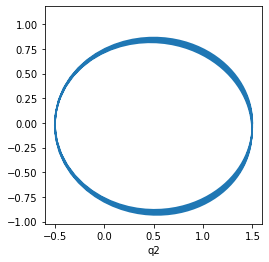

In [132]:
N = 1000             # To allocate sufficiently large arrays. Will be truncated at the end. 
tend = 10*np.pi
variable_stepsize = False

eps = 0.5
h0 = 2*np.pi/50      # For variable stepsizes, you may experiment with this value. 


def Tp(p):
    return p;

def Vq(q):
    r = np.sqrt(q[0]**2+q[1]**2)
    return -q/r**3

def g(q):
    r = np.sqrt(q[0]**2+q[1]**2)
    return 1/(1+r**(-1.5))

p = np.zeros((N+1,2))
q = np.zeros((N+1,2))
t = np.zeros(N+1)

q[0,:] = [1+eps,0]
p[0,:] = [0, np.sqrt((1-eps)/(1+eps))]
if variable_stepsize:
    h = g(q[0,:])*h0                          # Initial stepsize
n = 0
while t[n] < tend:
    qtmp = q[n,:]+0.5*h*Tp(p[n,:])
    ptmp = p[n,:]+0.5*h*Vq(qtmp)
    if variable_stepsize:
        hnew = 1/(2/g(qtmp)/h0-1/h)  
    else: 
        hnew = h                                  
    p[n+1,:] = ptmp+0.5*hnew*Vq(qtmp)
    q[n+1,:] = qtmp+0.5*hnew*Tp(p[n+1,:])
    t[n+1] = t[n]+0.5*(hnew+h)
    h = hnew
    n +=1

# Truncate the arrays. 
q = q[:n+1,:]
p = p[:n+1,:]
t = t[:n+1]

# Plot the solution (q_1,q_2)
plt.plot(q[:,0],q[:,1]) 
plt.xlabel('q1')
plt.xlabel('q2')
plt.axis('square')
print('Number of steps = ', len(t))

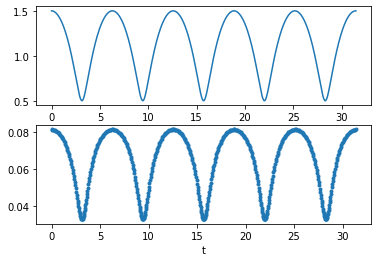

In [131]:
# Plot the stepsize and r vs. time. 
r = np.sqrt(q[:,0]**2+q[:,1]**2)
plt.subplot(2,1,1)
plt.plot(t,r, label='r')
plt.subplot(2,1,2)
plt.plot(t[:-1],np.diff(t),'.',label='stepsize')
plt.xlabel('t');